In [ ]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sy

# Interpolación con series de Taylor:
- la interpolacion con series de Taylor **NO** es una buena forma para realizar ajuste de funciones dado que el error puede variar segun el dominio, Dos ejemplos que relatan lo anterior son descritos a continuación:

# 1.0 Cálculo de la funcion exp(x) con la serie de Taylor:

In [ ]:
x = np.linspace(-1, 3, 100)

f0 = lambda x: 1
f1 = lambda x: 1 + x
f2 = lambda x: 1 + x + x**2/2
f3 = lambda x: 1 + x + x**2/2 + x**3/6
f4 = lambda x: 1 + x + x**2/2 + x**3/6 + x**4/24
f5 = lambda x: 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120


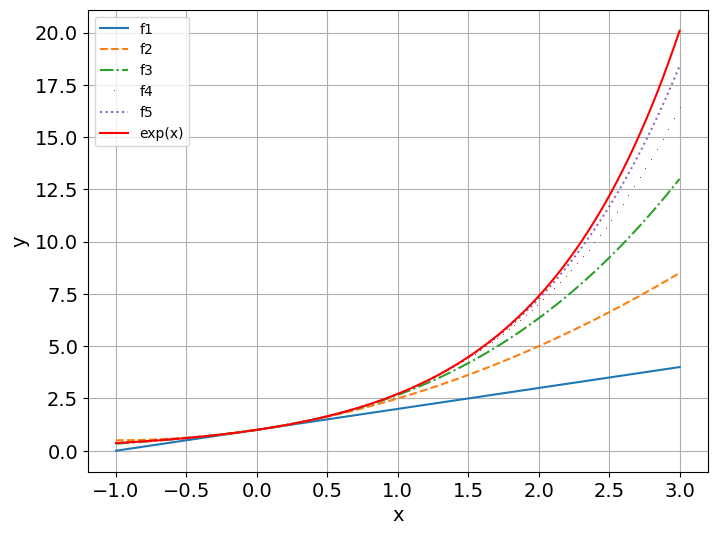

In [ ]:
# Polinomio
size_font = 14
plt.figure(figsize=(8,6))
plt.plot(x, f1(x), "-" , label = "f1")
plt.plot(x, f2(x), "--", label = "f2")
plt.plot(x, f3(x), "-." , label = "f3")
plt.plot(x, f4(x), ",", label = "f4")
plt.plot(x, f5(x), ":", label = "f5")
plt.plot(x, np.exp(x),"r-" , label = "exp(x)")
plt.xlabel("x", fontsize = size_font)
plt.ylabel("y", fontsize = size_font)
plt.xticks(fontsize = size_font)
plt.yticks(fontsize = size_font)
plt.grid()
plt.legend()
plt.show()

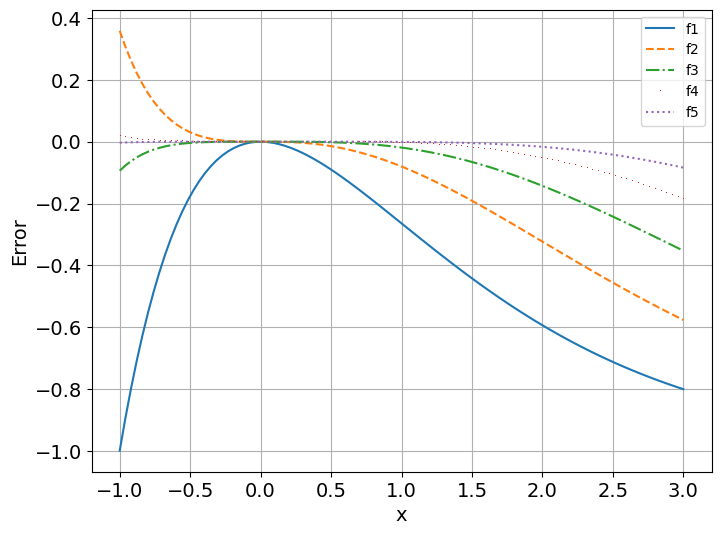

In [ ]:
#Error de la función
f_ref = np.exp(x)
plt.figure(figsize=(8,6))
plt.plot(x, (f1(x) - f_ref)/f_ref, "-" , label = "f1")
plt.plot(x, (f2(x) - f_ref)/f_ref, "--", label = "f2")
plt.plot(x, (f3(x) - f_ref)/f_ref, "-." , label = "f3")
plt.plot(x, (f4(x) - f_ref)/f_ref, ",", label = "f4")
plt.plot(x, (f5(x) - f_ref)/f_ref, ":", label = "f5")
plt.legend()
plt.xlabel("x", fontsize = size_font)
plt.ylabel("Error", fontsize = size_font)
plt.xticks(fontsize = size_font)
plt.yticks(fontsize = size_font)
plt.grid()
plt.show()

## 2 Cálculo de la funcion f(x) = 1/x evaluada en x= 3, con la serie de Taylor:

Una mejor aproximación,  puede ser realizada  de aumentando el orden de la serie de taylor, pero, no neceariamente tenemos una buena aproximación,   con el aumento del orden de la serie de Taylor.
Consideremos la función $f(x)=1/x$ y evaluemos la función en el punto x = 3. Recordemos que la serie de Taylor de una función viene dada por:

\begin{equation}
f(x) = \sum_{n = 0}^{\infty} \frac{\mathrm{d}^n f(a)}{\mathrm{d}x^n}(x-a)^n
\end{equation}

Las primeras derivadas de la función vienen dadas por:  $f(x)=x^{-1}$, $f'(x)=-x^{-2}$, $f''(x)= (-1)^2 2 x^{-3}$ ... $f^{k}(x)=(-1)^{k}k!x^{-k-1}$


La serie de Taylor,  para esta función puede ser escrita como:

\begin{equation}
P_n(x) = \sum_{k = 0}^{n} \frac{f^{k}(1)}{k!}(x-1)^k = \sum_{k = 0}^{n} (-1)^{k}(x - 1)^k
\end{equation}




In [ ]:
P = lambda x: (-1)**k*( x - 1)**k
Pexact = lambda x: 1/x

In [ ]:
_PN = np.zeros(10) #!0 primeros valores del polinomio

_PN[0] = 1

for i in range (1, len(_PN)):

  k = i
  _PN[i] = P(3) + _PN[ i - 1]


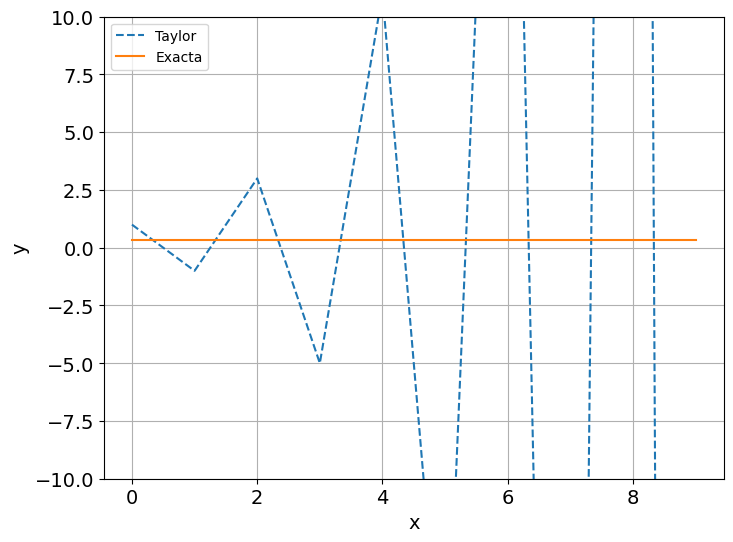

In [ ]:
f_ref = np.exp(x)
plt.figure(figsize=(8,6))
plt.plot(_PN,"--", label = "Taylor")
plt.plot(np.ones(10)*Pexact(3), label ="Exacta")
plt.legend()
plt.xlabel("x", fontsize = size_font)
plt.ylabel("y", fontsize = size_font)
plt.xticks(fontsize = size_font)
plt.yticks(fontsize = size_font)
plt.ylim(-10,10)
plt.grid()
plt.show()



# Interpolación con polinomios de lagrange

\begin{equation}
L_j(x) = \prod_{i=0\\i\neq j}^{n} \frac{x-x_i}{x_j-x_i}
\end{equation}

\begin{equation}
P(x)= \sum_{k=0} ^{n} f(x_k)L_k(x)
\end{equation}


El error dado por este metodo, viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}




La razon anterior es necesaria para entender que realizar una aproximación con series de Taylor alrededor de un punto no implica un buena aproximación, por eso, son necesarios algunos metodos para poder realizar el ajuste correcto.

In [ ]:
#Ejemplo:  Dados los puntos:
_x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
# Encontar un interpolacion a através del polinomio del polinomio de lagrange:

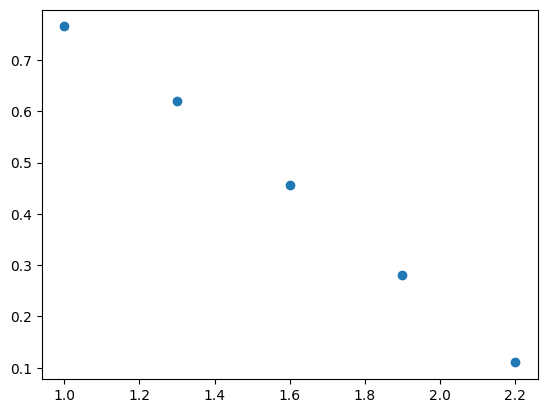

In [ ]:
plt.plot(_x, fx,"o")

In [ ]:
import sympy as sy

In [ ]:
#Esta rutina determina el polinomio de lagrange
#Polinomio de lagrange de orden j
x = sy.symbols("x")

def Lagrange_j( xi, xj, n ):
  x = sy.symbols("x")
  _L = 1
  for i in range(0, n):
    if(xi[i] == xj):
      continue
    else:
      num = x - xi[i]
      den = xj - xi[i]
      _L = num  *_L / den
  return _L

In [ ]:
_x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])


In [ ]:
from sympy import init_printing
init_printing() ##Latex
pp = Lagrange_j( _x, _x[1], 5 ) #Lagrange de orden n= 5


In [ ]:
pp

-6.17283950617284⋅(x - 2.2)⋅(x - 1.9)⋅(x - 1.6)⋅(3.33333333333333⋅x - 3.333333
33333333)

In [ ]:
poly = lambda xstar: Lagrange_j( _x, xstar, 5 ) #Funcion para evaluar el polinomo de lagrange L (x*)

In [ ]:
#Construimos el polinomio para los datos dados:

f = fx[0]*Lagrange_j(_x, _x[0], 5)
for i in range(1, 5):
  f = fx[i] * Lagrange_j(_x, _x[i], 5) + f  #Construccion del polinomio final
poli = sy.simplify(f) #Simplificacion del polinomio

print(poli)

0.00182510288066506*x**4 + 0.0552927983538751*x**3 - 0.343046604938195*x**2 + 0.0733913477365888*x + 0.977735055967113


In [ ]:
#Evaluemos el polinomio para x entre 0, 4
value_x = np.linspace(0, 4, 100)
p1 = np.zeros(100)
for i in range(0, len(value_x)):
  p1[i] = f.subs(x,value_x[i]) #Variable x, evaluacion del polinomio en los valores definidos por value_x empleando sympy

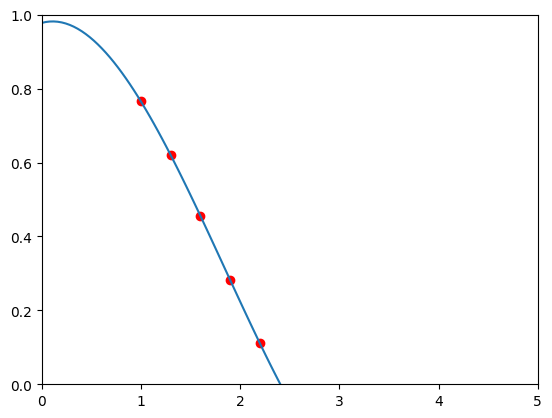

In [ ]:
#Grafica de la funcion
plt.plot()
plt.plot(_x, fx, "ro")
plt.plot(value_x, p1, "-")
#plt.plot(value_x, fxn(value_x), "-.")
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.show()

In [ ]:
#A traves de las librerias de scipy, interpolemos los datos anteriores:
from scipy.interpolate import lagrange

_x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

poly = lagrange(_x, fx)

In [ ]:
poly

poly1d([ 0.0018251 ,  0.0552928 , -0.3430466 ,  0.07339135,  0.97773506])

In [ ]:
poly[4]

0.0018251028806651748

In [ ]:
value_x = np.linspace(0, 4, 100)
#def polinomio():
value = poly[0]*1.5**0 + poly[1]*1.5**1 + poly[2]*1.5**2 + poly[3]*1.5**3 + poly[4]*1.5**4
print(value)

0.5118199942387228


In [ ]:
x = np.linspace(1, 3, 5)
x

array([1. , 1.5, 2. , 2.5, 3. ])

In [ ]:
x = np.linspace(1, 3, 5)
poly(x)

array([ 0.7651977 ,  0.51181999,  0.22387536, -0.0475848 , -0.24877146])

In [ ]:
x=np.linspace(0.8, 2.5, 10)
poly(x)

array([ 0.84595578,  0.77006068,  0.68216048,  0.58481082,  0.48062308,
        0.37226441,  0.26245774,  0.15398173,  0.04967082, -0.0475848 ])

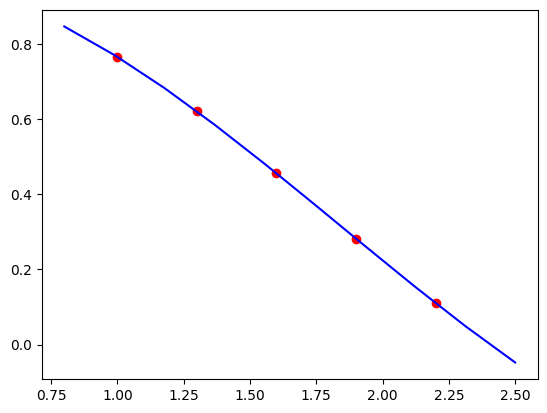

In [ ]:
plt.plot(_x, fx, "ro")
plt.plot(x, poly(x), "b-")
#plt.xlim(0.8, 2.5)


# Datos para interpolar con el polinomio de lagrange

In [ ]:
import numpy as np

In [ ]:
# Datos del covid.
t1 =  np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])
inf = np.array([1, 1, 1, 1, 3, 9, 9, 13, 22, 34, 54, 65, 93, 102, 128, 196, 231,
       277, 378, 470, 491, 539, 608, 702, 798, 906, 1065, 1161, 1267,
       1406, 1485, 1579, 1780, 2054, 2223, 2473, 2709, 2776, 2852, 2979,
       3105, 3233, 3439, 3439, 3792], dtype=object)

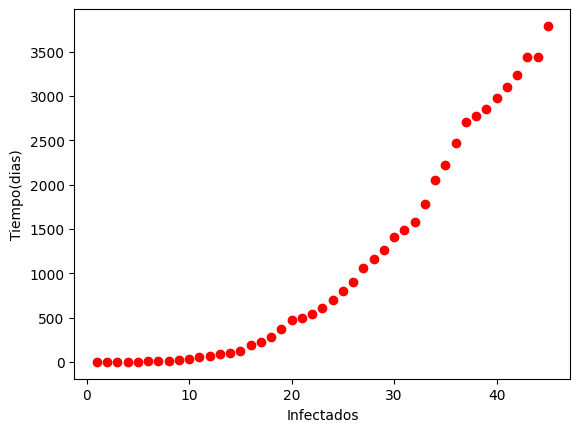

In [ ]:
plt.figure()
plt.plot(t1, inf, "ro")
plt.xlabel("Infectados")
plt.ylabel("Tiempo(dias)")
plt.show()

In [ ]:
from scipy.integrate import odeint
import matplotlib.pylab as plt
from scipy.optimize import curve_fit


In [ ]:
#Equation for fit
def fun_exp(x, a, b ):

    return a * np.exp(b*x)

#Fit exp
def fit_exp(d):

    t1 = np.arange(1, len(d) + 1, 1)

    popt, pcov = curve_fit(fun_exp, t1, d)

    return popt, pcov


f_col = fit_exp(inf)
params= f_col[0]
t  = np.linspace(1, 50, 100) #Tome for fit

y=fun_exp(t, *params)




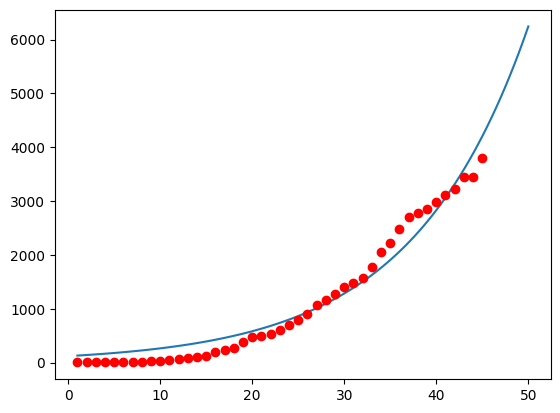

In [ ]:
plt.figure()
plt.plot(t, y, label="A e^{x}")
plt.plot(t1, inf, "ro")
plt.show()

In [ ]:
#A traves de las librerias de scipy, interpolemos los datos anteriores:
from scipy.interpolate import lagrange
poly = lagrange(t1[0:10], inf[0:10])

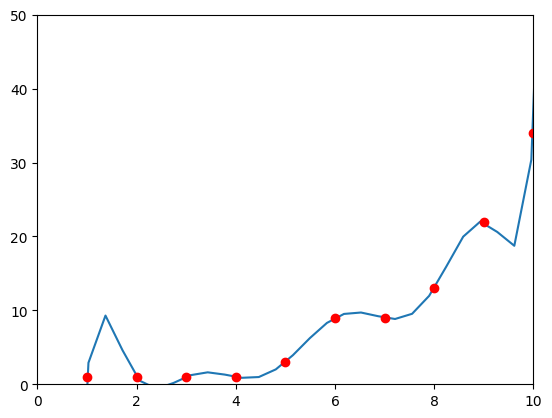

In [ ]:
x = np.linspace(0, np.max(inf[0: 10]), 100)
poly(x)
plt.plot(x, poly(x))
plt.plot(t1[0: 10], inf[0: 10], "ro" )
plt.xlim(0, 10)
plt.ylim(0, 50)
plt.show()

In [ ]:
[]

[]